5章 モデルの評価と改良
（教師あり学習のモデルの評価とパラメータの選択）

モデルの評価：
- 教師あり学習：　定量的
- 教師なし学習：　定性的

教師あり学習の評価：
- scoreメソッド：　R^2スコア。正しく分類されたサンプルの割合を計算
- 他

評価：
- 交差検証：　より頑健な汎化性能評価手法
- 分類と回帰の評価でもscoreメソッドのR^2より良い方法を探す
- グリッドサーチ


In [6]:
# インポート集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
%matplotlib inline

In [3]:
# 評価（scoreメソッド）
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# データロード
x,y = make_blobs(random_state=0)
# データ分割
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
# ロジスティク回帰
ml = LogisticRegression().fit(ax,ay)
# スコア
ml.score(ex,ey)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.88

In [4]:
# -> 88%

5.1 交差検証
- 汎化性能を評価する統計手法
- データ分割を何度も行い、複数のモデルを訓練
- k分割交差検証が多い（層化、グループ付きも）
- 新しいデータに適用するためのモデルを作る方法ではない。（モデルを返さない）
- 目的：　アルゴリズムがあるデータに対してどの程度汎化できるか評価するだけ


交差検証の長所：
- 信頼性高い（一度だけの分割(train_test_split）では、たまたまで精度の良し悪しが出る）
- モデルの性能の幅がわかる（irisでは90% ~ 100%の範囲で変動）（最良と最悪）

短所：
- 計算コスト（1回の分割よりk倍遅くなる）

パラメータ：
- cv：　ユーザが設定する分割数。
 - cvに交差検証分割器を与えると、データの分割方法を詳細に制御可能
 
sklearnのデフォルト：
- 分類：　層化k分割交差検証
- 回帰：　k分割交差検証

k分割交差検証(k-fold cv)：
- k：　データの分割数。ユーザが決定。5から10が多い
- 手順（5分割の場合）：
 1. 最初の1つをテストセットとし、残り4つを訓練セットとしてモデル構築、精度評価。
 2. 次に2つ目をテストセットし、残り4つを訓練セットとしてモデル構築、精度評価。
 3. 同様に5回繰り返して5つの精度を求める
 
層化k分割交差検証(stratified k-fold cv)：
- 各分割後のセット内でのクラスの比率が全体のクラス比率と同じになるように分割。

1つ抜き交差検証(leave one out)：
- k分割交差検証の個々の分割セットが1サンプルだけのもの（毎回1サンプルだけをテスト）
- 非常に遅いが、より良い評価が可能

シャッフル分割交差検証(ShuffleSplit cv)：
- 非常に柔軟
- 毎回train_size個の点を選び訓練セットとし
  test_size個の（訓練セットと重複しない）点を選びテストセットとする
- これをn_iter回繰り返す。
- サイズ指定は整数（個数）or 小数（割合）
- 訓練セットとテストセットのサイズとは独立に、繰り返し回数を指定可能（これが役立つ場面も多い）
- train_sizeとtest_sizeの和が1にならないように設定することで、データの一部だけ用いることも可。
 - これをサブサンプリングと呼び、データセットが大きい場合に有効
- 層化バージョン：　StratifiedShuffleSplit　（クラス分類に有効）

グループ付き交差検証(GroupFold cv)：
- データセットの中に、密接に関係するグループがある場合に用いられる
- 例：　顔画像からの感情認識タスク：　
 - 層化交差検証では同じ人の顔が訓練セットとテストセットに出現（簡単なはずなので困る）
 - GroupFoldなら、引数のgroup配列に、画像に写っている人を指定。
 - group配列：　
   - 訓練セットとテストセットの分割時に分割してはならないグループを表す（クラスラベルと異なる）
- 応用：
 - 発話認識
   -  同じ話者の発話録音データが複数あるが、認識したいのは新しい話者の発話
 - 医療用アプリケーション
   - 同じ患者から複数のサンプルが得られるが、欲しいのは新しい患者への汎化性能

sklearnの様々な交差検証：
- http://scikit-learn.org/stable/modules/cross_validation.html 



 

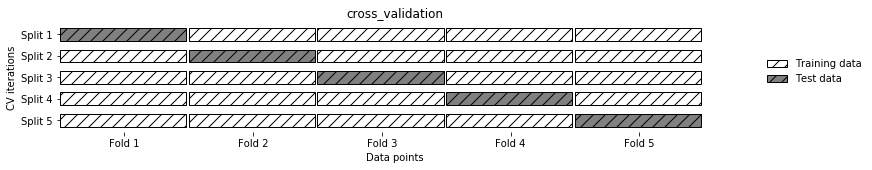

In [8]:
# k分割交差検証の様子（5分割サンプル）
mglearn.plots.plot_cross_validation()

In [24]:
# k分割交差検証 x iris
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# データロード
d = load_iris()
x = d.data
y = d.target
# ロジスティック回帰
ml = LogisticRegression()
# k分割交差検証スコア
s = cross_val_score(ml, x, y)
s

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWar

array([0.96078431, 0.92156863, 0.95833333])

In [10]:
# -> k分割交差検証　：　デフォルトで3分割（3つの精度算出）

In [25]:
# 分割数を5に変更（パラメータcv=5）
s = cross_val_score(ml, x, y, cv=5)
s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [26]:
# -> 5値になった

In [27]:
# 交差検証の精度をまとめるには、一般に平均値を用いる
s.mean()

0.9600000000000002

In [28]:
# -> モデルが９６％の割合で正しいといえる。5つの値がバラつくのは、データセットが小さいせいもある。

In [33]:
# データセットをk分割する際に、データセットの先頭から1/k個取るのは良くないケースもある
from sklearn.datasets import load_iris
d = load_iris()
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# -> これで先頭から3分割したら、精度は0になる。

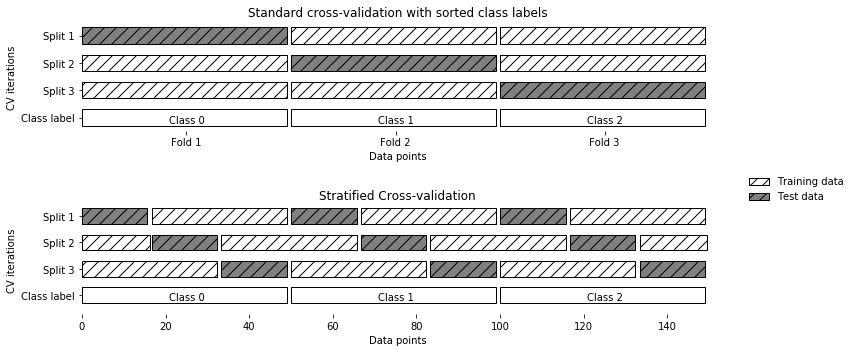

In [35]:
#　層化k分割交差検証（分類でのデフォルト）(分割後のセット内のクラス比率が全体と同じになるよう分割)
mglearn.plots.plot_stratified_cross_validation()

In [36]:
# 分類でk分割交差検証（層化でないバージョン）（KFold分割器で分割し、引数として渡すだけ）
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
cross_val_score(ml, x, y, cv=kf)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [37]:
# 　irisで試す
kf = KFold(n_splits=3)
cross_val_score(ml, x, y, cv=kf)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0., 0., 0.])

In [38]:
# -> 見事０％

In [39]:
# 層化の他に、データをシャッフルしてもいい（KFoldのパラメータshaffle=True）
# シャッフルする場合、random_stateも設定して再現可能にすると良い
kfs = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(ml, x, y, cv=kfs)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.9 , 0.96, 0.96])

In [40]:
# -> シャッフルで解決

In [45]:
# 1つ抜き交差検証（分割セット内には1点だけ（遅いが、より正確な精度が出せる））
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
s = cross_val_score(ml, x, y, cv=loo)
print(len(s))
print(s.mean())

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

150
0.9533333333333334


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


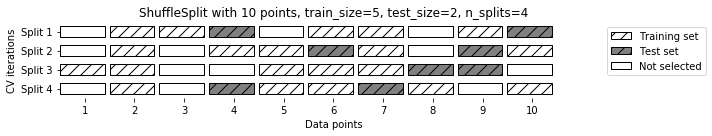

In [47]:
# シャッフル分割交差検証（サンプル）（訓練サイズ5, テストサイズ2、分割数4）
mglearn.plots.plot_shuffle_split()

In [50]:
# シャッフル分割交差検証 （訓練サイズ50%, テストサイズ50%、分割数10指定）
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
s = cross_val_score(ml, x, y, cv=ss)
s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.90666667, 0.93333333, 0.92      , 0.94666667, 0.90666667,
       0.96      , 0.94666667, 0.94666667, 0.93333333, 0.96      ])

In [52]:
# グループ付き交差検証
from sklearn.model_selection import GroupKFold
# データロード（データ数12点）
x,y = make_blobs(n_samples=12, random_state=0)
# 最初の3サンプルを同じグループに、次の4つを同じグループに、グループインデックス指定でグループ化
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
# スコア（3分割）
cross_val_score(ml, x, y, groups, cv=GroupKFold(n_splits=3))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.75      , 0.8       , 0.66666667])

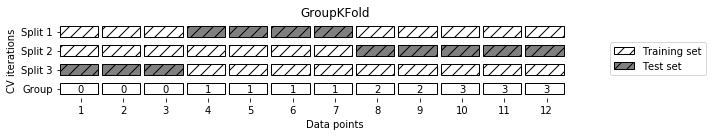

In [56]:
# グループ付き交差検証（サンプル）
mglearn.plots.plot_group_kfold()

5.2 グリッドサーチ
- パラメタ調整手法の一つ
- 基本的に全てのパラメタの組み合わせを試す方法

例：　RBFのSVM：　
- クラス：　SVC
- パラメタ：
 - gamma：　カーネルのバンド幅
 - C：　正則化パラメタ
 - グリッドサーチでgammaとCを0.001, 0.01, 1, 10, 100の6種類に降る（計36通り）

In [58]:
# 単純なグリッドサーチ（悪例）
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# データロード
d = load_iris()
x = d.data
y = d.target
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
# ベストスコア用変数用意
best_s = 0
# gammmaとCを各6通り振る（計36通り）
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # SVCモデル定義・学習
        ms = SVC(gamma=gamma, C=C)
        ms.fit(ax, ay)
        # スコア算出
        s = ms.score(ex, ey)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
#　訓練データ形状とテストデータ形状表示
print(ax.shape[0], ex.shape[0])
# ベストスコア、ベストパラメタ表示
print(best_s)
print(best_p)

112 38
0.9736842105263158
{'C': 100, 'gamma': 0.001}


In [59]:
# -> パラメタ36通り試して、C=100, gamma=0.001がmaxスコア(97%)とわかった

#  ただし、このデータセットに対してその精度のモデルを見つけたとは言えない理由：
#  このテストセットに対して最高精度が出るパラメタを発見。
#  このテストセットはパラメタ調整に使ったので、モデルの精度評価には使ってはいけない。

# （データを訓練データとテストセットに分割する理由と同じ。
# モデルを評価するためのデータは、モデルの構築には用いていない、独立したデータでなければいけない。）

# 解決法：　データをもう一度分割し、３セットにする
# - 訓練セット：　モデル構築用
# - 検証セット：　モデルパラメタ選択用　(開発セット)
# - テストセット：　選択したパラメタ性能評価

# 検証セットで最良のパラメタ選択したら、そのパラメタでモデルを再構築
# （訓練データだけでなく検証データも用いる（可能な限りデータを有効利用してモデル構築可能））


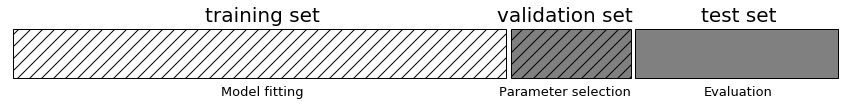

In [61]:
# データ3分割の図
mglearn.plots.plot_threefold_split()

In [65]:
# グリッドサーチ（データ3分割）
from sklearn.svm import SVC
# データ分割（まずx,yをいつもの２分割）
avx, ex, avy, ey = train_test_split(x, y, random_state=0)
# データ分割（avxとax, vxに分け、avyをay, vyに分ける。３分割完成）
ax, vx, ay, vy = train_test_split(avx, avy, random_state=1)
# ベストスコア用変数用意
best_s = 0
# gammmaとCを各6通り振る（計36通り）
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # SVCモデル定義・学習
        ms = SVC(gamma=gamma, C=C)
        ms.fit(ax, ay)
        # スコア算出（検証用データ使用！）
        s = ms.score(vx, vy)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットでモデルを再構築し、テストセットで評価
ms = SVC(**best_p)
ms.fit(avx, avy)
es = ms.score(ex, ey)            
# ベストスコア、ベストパラメタ、テストスコア表示
print(best_s)
print(best_p)
print(es)


0.9642857142857143
{'C': 10, 'gamma': 0.001}
0.9210526315789473


In [66]:
# -> 検証セットに対するベストスコアは96%で、若干低くなった（理由：　データ量が減ったため）
#      新しいデータ（テストセット）に対するスコアは92%であり、汎化性能として主張できるのはこちらの数字になる。

# 訓練セット、検証セット、テストセットの区別は機械学習の実運用で根本的に重要！
# テストセットからモデルへ情報漏洩がないように分離。（信頼できなくなる）

# 全ての探索的な解析とモデル選択は訓練セットと検証セットで行うこと
# （テストセットは最後の評価にだけ使用）
# （探索的可視化だけの場合でも重要）

# 厳密に言えば、テストセットで2つ以上のモデルを評価して良い方を選ぶだけでもダメ

# 上記では、1回目はC=10, gamma=0.001、　2回目はC=100, gamma=0.001が最良で結果が変わった。

In [68]:
# 交差検証を用いたグリッドサーチ
# （各パラメタ計36通りに対して5分割交差検証し、5つの精度を出す。その平均値が最大となるパラメタを選択）
# （遅いのが難点）
for gamma in [0.001, 0.01, 0.1, 1, 10,100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        # 各パラメタでモデル構築
        ms = SVC(gamma=gamma, C=C)
        # 交差検証スコア算出(分割数5)
        ss = cross_val_score(ms, avx, avy, cv=5)
        # 平均をとる
        s = np.mean(ss)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットでモデルを再構築し、テストセットで評価
ms = SVC(**best_p)
ms.fit(avx, avy)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


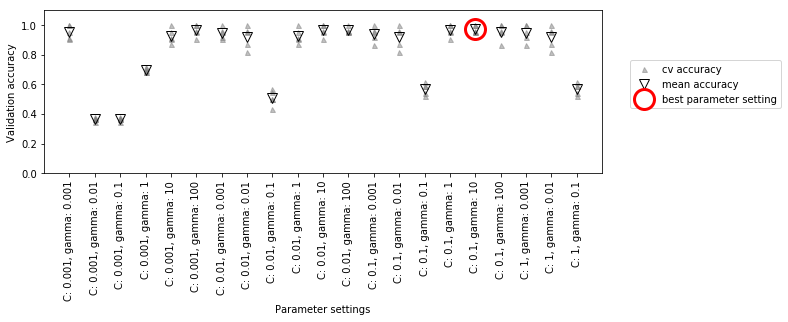

In [69]:
# 交差検証を用いたグリッドサーチ（可視化サンプル）
mglearn.plots.plot_cross_val_selection()

In [70]:
# -> 赤丸：　平均値が最大となるパラメタ組み合わせの精度

# 交差検証を用いたグリッドサーチを指して、単に交差検証という場合もある

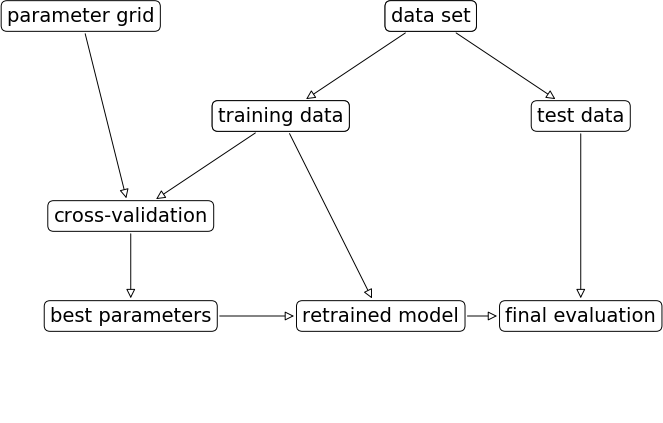

In [71]:
# 交差検証を用いたグリッドサーチ（フローチャートサンプル）
mglearn.plots.plot_grid_search_overview()

交差検証を用いたグリッドサーチ：
- 非常によく使われる
- sklearnのGridSearchCVクラスで使用可能
- まず辞書形式でパラメタ指定

GridSearchCV：
- 通常の分類モデルと同様fit、predict、scoreメソッド使える
- 

In [73]:
# 交差検証を用いたグリッドサーチ（GridSearchCVクラス使用）
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# パラメタ辞書作成（計36通り）
pg = {'C': [0.001, 0.01, 0.1, 1, 10,100],
     'gamma': [0.001, 0.01, 0.1, 1, 10,100]}
# グリッドサーチオブジェクト作成（モデル、パラメタ辞書、分割数5指定）
gs = GridSearchCV(SVC(), pg, cv=5)
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
gs.fit(ax,ay)
gs.score(ex,ey)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9736842105263158